# Imports

Importing the necessary packagaes for EDA/Data Prep and Viz

In [18]:
import pandas as pd
import numpy as np 
import warnings
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px # Imported for GANNT chart creation.
import matplotlib.offsetbox as offsetbox
import matplotlib.image as image
from matplotlib.text import Text



warnings.filterwarnings('ignore')

# Project Management

This Project follows the CRISP-DM Project Management Principles.
In order to demonstarate this a GANNT chart using Plotly's express libary (px)

This initial chart will be compared to a completed one at the end of the project

In [233]:
ProjectGanttChart = pd.DataFrame([
    dict(Task="Planning", Start='2022-11-28', Finish='2022-12-04', Percentage_Completed=0),
    dict(Task="Research", Start='2022-12-04', Finish='2022-12-18',  Percentage_Completed=0),
    dict(Task="Justifcation", Start='2022-12-18', Finish='2022-12-20',Percentage_Completed=0),
    dict(Task="Initial_Implementation", Start='2022-12-20', Finish='2022-12-23', Percentage_Completed=0),
    dict(Task="Holiday", Start='2022-12-23', Finish='2022-12-29', Percentage_Completed=100),
    dict(Task="Final_Implementation", Start='2022-12-29', Finish='2023-01-03', Percentage_Completed=0),
    dict(Task="Report", Start='2023-01-03', Finish='2023-01-06', Percentage_Completed=0),
    dict(Task="Submission", Start='2023-01-06', Finish='2023-01-06',Percentage_Completed=0),
])

fig = px.timeline(ProjectGanttChart, x_start="Start", x_end="Finish", y="Task", color="Percentage_Completed")
# Title was not centred so used the below to centre to title layout.
fig.update_layout(title_text=" Initial CA2 GANNT Chart", title_x=0.5)
fig.show()

Placeholder for Final GANTT Chart to be completed after the project is completed

In [20]:
#FinalProjectGanttChart = pd.DataFrame([
#    dict(Task="Planning", Start='2022-11-28', Finish='2022-12-04', Percentage_Completed=0),
#    dict(Task="Research", Start='2022-12-04', Finish='2022-12-18',  Percentage_Completed=0),
#    dict(Task="Justifcation", Start='2022-12-18', Finish='2022-12-20',Percentage_Completed=0),
#    dict(Task="Initial_Implementation", Start='2022-12-20', Finish='2022-12-23', Percentage_Completed=0),
#    dict(Task="Holiday", Start='2022-12-23', Finish='2022-12-29', Percentage_Completed=100),
#    dict(Task="Final_Implementation", Start='2022-12-29', Finish='2023-01-03', Percentage_Completed=0),
#    dict(Task="Report", Start='2023-01-03', Finish='2023-01-06', Percentage_Completed=0),
#    dict(Task="Submission", Start='2023-01-06', Finish='2023-01-06',Percentage_Completed=0),
#])

#fig = px.timeline(FinalProjectGanttChart, x_start="Start", x_end="Finish", y="Task", color="Percentage_Completed")
# Title was not centred so used the below to centre to title layout.
#fig.update_layout(title_text="CA2 GANNT Chart", title_x=0.5)
#fig.show()

# EDA ( Early Data analysis ) 

This part contains the steps and processes in obtaining and cleaning the data for this project

The task at hand is analysing Ireland's Agricultural data and comparing the Irish Agri sector with other countries worldwide.

Coming from somehwat of a farming background I have decided on looking at Cattle data

From some quick checks online, Germany, France and Ireland account for some of the biggest Bovine population in the EU.
Later I will compare just these 3 Countries

Here I am trying to add country flags to my data/graphs. I found this package online at : https://pypi.org/project/emoji-country-flag/

# Agricultural Data

Now lets get the Agg data prepped for ML and Stats

These datasets are split into 2 parts, Dairy and Bovine sets

In [52]:
Dairy_Cow_Numbers = pd.read_csv ('../datasets/tag00014_page_linear.csv')
Dairy_Milk_Prices = pd.read_csv ('../datasets/tag00070_page_linear.csv')

In [53]:
Bovine_Numbers = pd.read_csv ('../datasets/tag00016_page_linear.csv')
Bovine_Meat_No = pd.read_csv ('../datasets/tag00044_page_linear.csv')

These datasets have been taken from Eurostat , from https://ec.europa.eu/eurostat/web/main/data/database

I have already just taken data from Ireland, Germany and Spain. So now lets aim to create three final datasets , 1 for each country

# Explortory Data Analysis

In [58]:
Dairy_Milk_Prices.head()

,DATAFLOW,LAST UPDATE,freq,currency,prod_ani,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:TAG00070(1.0),27/11/22 23:00:00,A,EUR,12112000,DE,2010,31.23,NaN
1,ESTAT:TAG00070(1.0),27/11/22 23:00:00,A,EUR,12112000,DE,2011,35.19,NaN
2,ESTAT:TAG00070(1.0),27/11/22 23:00:00,A,EUR,12112000,DE,2012,32.39,NaN
3,ESTAT:TAG00070(1.0),27/11/22 23:00:00,A,EUR,12112000,DE,2013,38.05,NaN
4,ESTAT:TAG00070(1.0),27/11/22 23:00:00,A,EUR,12112000,DE,2014,37.85,NaN


In [55]:
Dairy_Cow_Numbers.head()

,DATAFLOW,LAST UPDATE,freq,animals,month,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:TAG00014(1.0),04/01/23 23:00:00,A,A2300F,M12,THS_HD,DE,2010,4181.68,NaN
1,ESTAT:TAG00014(1.0),04/01/23 23:00:00,A,A2300F,M12,THS_HD,DE,2011,4190.10,NaN
2,ESTAT:TAG00014(1.0),04/01/23 23:00:00,A,A2300F,M12,THS_HD,DE,2012,4190.49,NaN
3,ESTAT:TAG00014(1.0),04/01/23 23:00:00,A,A2300F,M12,THS_HD,DE,2013,4267.61,NaN
4,ESTAT:TAG00014(1.0),04/01/23 23:00:00,A,A2300F,M12,THS_HD,DE,2014,4295.68,NaN


In [59]:
Bovine_Numbers.head()

,DATAFLOW,LAST UPDATE,freq,animals,month,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:TAG00016(1.0),04/01/23 23:00:00,A,A2000,M12,THS_HD,DE,2010,12706.23,NaN
1,ESTAT:TAG00016(1.0),04/01/23 23:00:00,A,A2000,M12,THS_HD,DE,2011,12527.84,NaN
2,ESTAT:TAG00016(1.0),04/01/23 23:00:00,A,A2000,M12,THS_HD,DE,2012,12506.77,NaN
3,ESTAT:TAG00016(1.0),04/01/23 23:00:00,A,A2000,M12,THS_HD,DE,2013,12685.99,NaN
4,ESTAT:TAG00016(1.0),04/01/23 23:00:00,A,A2000,M12,THS_HD,DE,2014,12742.19,NaN


In [57]:
Bovine_Meat_No.head()

,DATAFLOW,LAST UPDATE,freq,unit,meatitem,meat,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:TAG00044(1.0),24/10/22 23:00:00,A,THS_T,SL,B1000,DE,2010,1186.72,NaN
1,ESTAT:TAG00044(1.0),24/10/22 23:00:00,A,THS_T,SL,B1000,DE,2011,1159.00,NaN
2,ESTAT:TAG00044(1.0),24/10/22 23:00:00,A,THS_T,SL,B1000,DE,2012,1140.00,NaN
3,ESTAT:TAG00044(1.0),24/10/22 23:00:00,A,THS_T,SL,B1000,DE,2013,1106.00,NaN
4,ESTAT:TAG00044(1.0),24/10/22 23:00:00,A,THS_T,SL,B1000,DE,2014,1128.00,NaN


In [75]:
def needed_columns(df, columns):
  return df.loc[:, columns]

In [79]:

Dairy_Milk_Prices = needed_columns(Dairy_Milk_Prices, ['geo','TIME_PERIOD','OBS_VALUE'])
Dairy_Cow_Numbers = needed_columns(Dairy_Cow_Numbers, ['geo','TIME_PERIOD','OBS_VALUE'])

Bovine_Numbers = needed_columns(Bovine_Numbers, ['geo','TIME_PERIOD','OBS_VALUE'])
Bovine_Meat_No = needed_columns(Bovine_Meat_No, ['geo','TIME_PERIOD','OBS_VALUE'])

In [80]:
Bovine_Meat_No.head()

,geo,TIME_PERIOD,OBS_VALUE
0,DE,2010,1186.72
1,DE,2011,1159.00
2,DE,2012,1140.00
3,DE,2013,1106.00
4,DE,2014,1128.00


In [81]:
contain_nans = Dairy_Milk_Prices[['geo', 'TIME_PERIOD', 'OBS_VALUE']].isnull().any()
# if statement to check if any NaN's are present
if contain_nans.any():
    print("One of these columns contains NaN's")
else:
    print("No NaN's found, these columns are usable")

No NaN's found, these columns are usable


In [82]:

contain_nans = Dairy_Cow_Numbers[['geo', 'TIME_PERIOD', 'OBS_VALUE']].isnull().any()
# if statement to check if any NaN's are present
if contain_nans.any():
    print("One of these columns contains NaN's")
else:
    print("No NaN's found, these columns are usable")

No NaN's found, these columns are usable


In [83]:

contain_nans = Bovine_Numbers[['geo', 'TIME_PERIOD', 'OBS_VALUE']].isnull().any()
# if statement to check if any NaN's are present
if contain_nans.any():
    print("One of these columns contains NaN's")
else:
    print("No NaN's found, these columns are usable")

No NaN's found, these columns are usable


In [84]:
contain_nans = Bovine_Meat_No[['geo', 'TIME_PERIOD', 'OBS_VALUE']].isnull().any()
# if statement to check if any NaN's are present
if contain_nans.any():
    print("One of these columns contains NaN's")
else:
    print("No NaN's found, these columns are usable")

No NaN's found, these columns are usable


In [87]:
# List of Agriculture DF's
agg_dataframes = [Dairy_Milk_Prices,Dairy_Cow_Numbers,Bovine_Numbers,Bovine_Meat_No]

#Loop through the agg dataframes and rename the columns
for df in agg_dataframes:
    df.rename(columns={'geo': 'CountryCode','TIME_PERIOD' : 'Year'}, inplace=True)

In [88]:
Bovine_Meat_No.head()

,CountryCode,Year,OBS_VALUE
0,DE,2010,1186.72
1,DE,2011,1159.00
2,DE,2012,1140.00
3,DE,2013,1106.00
4,DE,2014,1128.00


All 4 Agriculture dataframes all now have matching columns, however each one has a different value, some are prices and some are populations.
Lets rename for easier reading going forward

<span style="color:green">Dairy_Milk_Prices contains price per 100KG for cows milk . It is in Euro </span>

<span style="color:red">Dairy_Cow_Numbers are the number of dairy cows ( Count is 1000 heads)</span>

<span style="color:blue">Bovine_Numbers is the total number of Bovine animals (Count is 1000 heads)</span>

<span style="color:orange">Bovine_Meat_No is  carcass weight of bovine animals (calves, bullocks, bulls, heifers and cows) meat which is suitable for human consumption. Count is 1000 Tonnes.</span>





As all 4 dataframes for Agriculture are different, now lets tidy each one up before moving on.




In [90]:
Dairy_Milk_Prices.rename(columns = {'OBS_VALUE':'MilkPrice (Per 100 KG €)'}, inplace = True)

In [93]:
Dairy_Cow_Numbers.rename(columns = {'OBS_VALUE':'DairyCowPopulation'}, inplace = True)

In [96]:
Bovine_Numbers.rename(columns = {'OBS_VALUE':'BovinePopulation'}, inplace = True)

In [98]:
Bovine_Meat_No.rename(columns = {'OBS_VALUE':'BovineMeatWeight(Tonnes)'}, inplace = True)

Below Im using the the apply function with a lambda function to multiply each of the defined columns by 1000. This way I am using the excat figure for each of the values.

In [100]:
Dairy_Cow_Numbers['DairyCowPopulation'] = Dairy_Cow_Numbers.apply(lambda row: row['DairyCowPopulation'] * 1000, axis=1)

In [102]:
Bovine_Numbers['BovinePopulation'] = Bovine_Numbers.apply(lambda row: row['BovinePopulation'] * 1000, axis=1)

In [103]:
Bovine_Meat_No['BovineMeatWeight(Tonnes)'] = Bovine_Meat_No.apply(lambda row: row['BovineMeatWeight(Tonnes)'] * 1000, axis=1)

Now lets check what datatype each value is before we move forward.

In [110]:
Dairy_Milk_Prices.dtypes
Dairy_Cow_Numbers.dtypes
Bovine_Meat_No.dtypes

CountryCode                  object
Year                          int64
BovineMeatWeight(Tonnes)    float64
dtype: object

There are 2 conversions to do for the population data. These are currently in the correct datatype, float64, but are not rounded to 0 decimal points.
Lets achive this by rounding them. The other data seems to be in correct dataypes

As this is a count data, I can also convert it to type 'integer' so we can remove the decimal point entirely.

In [114]:
Dairy_Cow_Numbers['DairyCowPopulation'] = Dairy_Cow_Numbers['DairyCowPopulation'].apply(round, ndigits=0).astype(int)

Bovine_Numbers['BovinePopulation'] = Bovine_Numbers['BovinePopulation'].apply(round, ndigits=0).astype(int)

In [115]:
#Now checking round has been successful
Dairy_Cow_Numbers.head()
#Bovine_Numbers.head()

,CountryCode,Year,DairyCowPopulation
0,DE,2010,4181680
1,DE,2011,4190100
2,DE,2012,4190490
3,DE,2013,4267610
4,DE,2014,4295680


Now the population counts are not showing any decimal points.

Now we have 5 dataframes which we now want to merge into 3 Country specific dataframes. Ireland, Germany and Spain

I am going to iterate through all the datframes I have , and use a for loop to append based on country codes to 3 new dataframes.

Firstly, my 8 dataframes are as follows:

<span style="color:green">Dairy_Milk_Prices</span>

<span style="color:red">Dairy_Cow_Numbers</span>

<span style="color:blue">Bovine_Numbers</span>

<span style="color:orange">Bovine_Meat_No</span>


In [176]:
from functools import reduce

merged_df = reduce(lambda x,y: pd.merge(x,y, left_on=['CountryCode', 'Year'], right_on=['CountryCode', 'Year'], how='outer', suffixes=('_left', '_right')), [Dairy_Milk_Prices,Dairy_Cow_Numbers,Bovine_Numbers,Bovine_Meat_No])

In [180]:
merged_df.dtypes
#merged_df['BovineMeatWeight(Tonnes)'] = merged_df['BovineMeatWeight(Tonnes)'].apply(round, ndigits=0).astype(int)

CountryCode                  object
Year                          int64
MilkPrice (Per 100 KG €)    float64
DairyCowPopulation            int64
BovinePopulation              int64
BovineMeatWeight(Tonnes)      int64
dtype: object

In [183]:
merged_df.head(100)

,CountryCode,Year,MilkPrice (Per 100 KG €),DairyCowPopulation,BovinePopulation,BovineMeatWeight(Tonnes)
0,DE,2010,31.23,4181680,12706230,1186720
1,DE,2011,35.19,4190100,12527840,1159000
2,DE,2012,32.39,4190490,12506770,1140000
3,DE,2013,38.05,4267610,12685990,1106000
4,DE,2014,37.85,4295680,12742190,1128000
5,DE,2015,29.59,4284640,12635460,1124000
6,DE,2016,27.20,4217700,12466590,1148000
7,DE,2017,35.10,4199010,12281200,1124000
8,DE,2018,34.72,4100860,11949090,1102000
9,DE,2019,33.70,4011670,11639530,1106000


In [184]:
df_ireland = merged_df.loc[merged_df['CountryCode'] =='IE']
df_germany = merged_df.loc[merged_df['CountryCode'] =='DE']
df_spain = merged_df.loc[merged_df['CountryCode'] =='ES']

In [185]:
df_ireland.head(25)

,CountryCode,Year,MilkPrice (Per 100 KG €),DairyCowPopulation,BovinePopulation,BovineMeatWeight(Tonnes)
24,IE,2010,28.15,1006900,5917700,559000
25,IE,2011,33.55,1035640,5925320,546760
26,IE,2012,30.83,1060260,6253240,495400
27,IE,2013,37.76,1082460,6309050,517570
28,IE,2014,36.42,1127720,6243050,581810
29,IE,2015,28.64,1239890,6422230,564140
30,IE,2016,27.25,1295230,6613430,588360
31,IE,2017,36.31,1343300,6673590,617020
32,IE,2018,33.87,1369100,6593490,622540
33,IE,2019,32.53,1425760,6559650,619800


Reseting index's for final dataset saving.

In [186]:
final_dfs = [df_ireland,df_spain,df_germany]

for df in final_dfs:
    df.reset_index(drop=True, inplace=True)

In [215]:
df_ireland.head(25)

,CountryCode,Year,MilkPrice (Per 100 KG €),DairyCowPopulation,BovinePopulation,BovineMeatWeight(Tonnes)
0,IE,2010,28.15,1006900,5917700,559000
1,IE,2011,33.55,1035640,5925320,546760
2,IE,2012,30.83,1060260,6253240,495400
3,IE,2013,37.76,1082460,6309050,517570
4,IE,2014,36.42,1127720,6243050,581810
5,IE,2015,28.64,1239890,6422230,564140
6,IE,2016,27.25,1295230,6613430,588360
7,IE,2017,36.31,1343300,6673590,617020
8,IE,2018,33.87,1369100,6593490,622540
9,IE,2019,32.53,1425760,6559650,619800


In [214]:
df_ireland.describe()

,Year,MilkPrice (Per 100 KG €),DairyCowPopulation,BovinePopulation,BovineMeatWeight(Tonnes)
count,12.000000,12.000000,1.200000e+01,1.200000e+01,12.000000
mean,2015.500000,33.054167,1.245632e+06,6.390792e+06,578357.500000
std,3.605551,3.754460,1.777104e+05,2.652778e+05,43397.769764
min,2010.000000,27.250000,1.006900e+06,5.917700e+06,495400.000000
25%,2012.750000,30.282500,1.076910e+06,6.250692e+06,555940.000000
50%,2015.500000,33.290000,1.267560e+06,6.475835e+06,585085.000000
75%,2018.250000,36.337500,1.383265e+06,6.598475e+06,617715.000000
max,2021.000000,38.310000,1.505270e+06,6.673590e+06,633380.000000


From my finsihed data I can see the following when checking the data.

<span style="color:green">Year</span> - Has 12 years of data, with a max of 2021 and a min of 2010


Now we are happy with EDA and Data Prep.


This data is now ready for ML and Stats work

In [ ]:
# Setting up paiplots for the 3 countrys data. Doing this to try

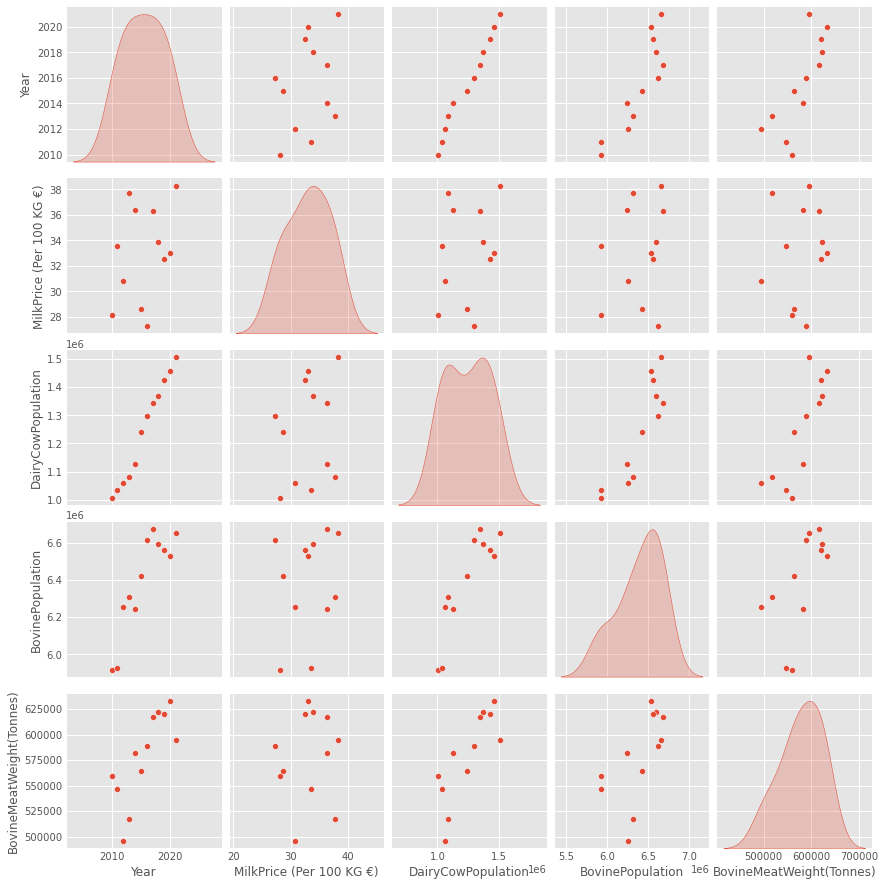

In [230]:
sns.pairplot(df_ireland[['Year','MilkPrice (Per 100 KG €)','DairyCowPopulation','BovinePopulation','BovineMeatWeight(Tonnes)']],diag_kind="kde");

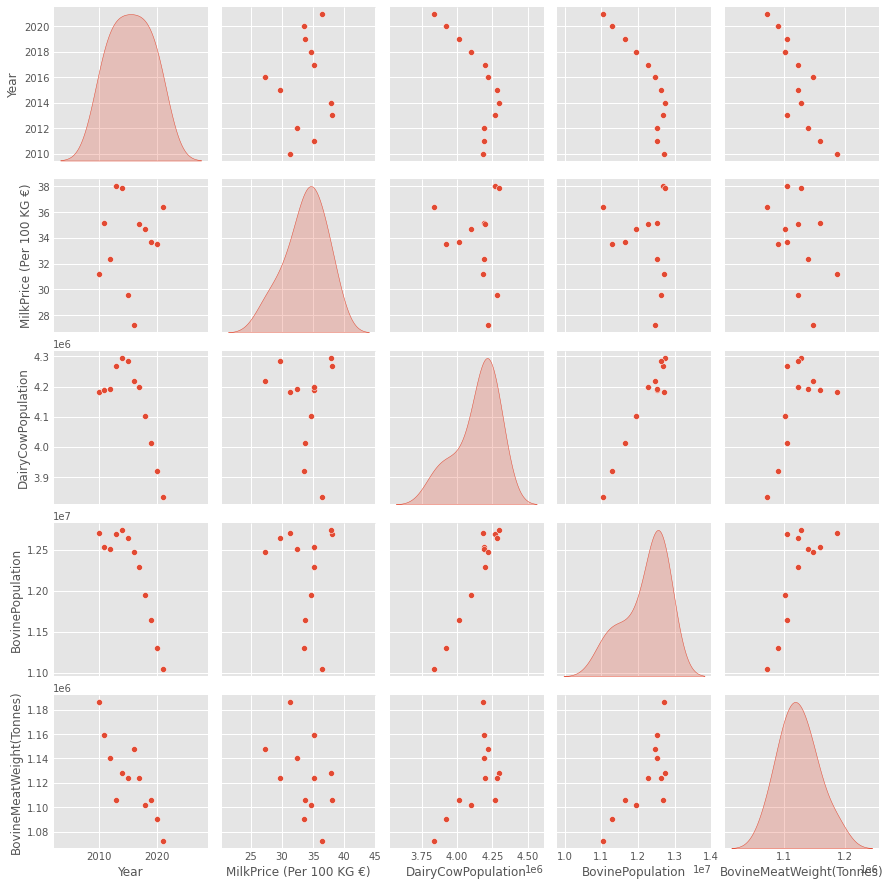

In [231]:
sns.pairplot(df_germany[['Year','MilkPrice (Per 100 KG €)','DairyCowPopulation','BovinePopulation','BovineMeatWeight(Tonnes)']],diag_kind="kde");

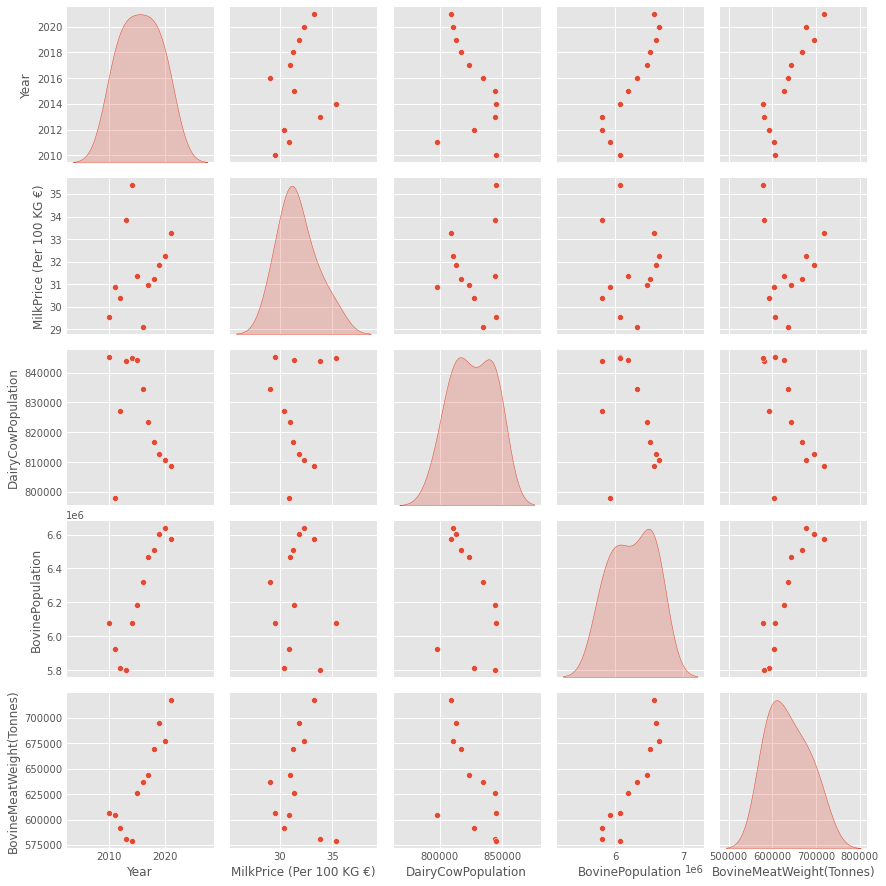

In [232]:
sns.pairplot(df_spain[['Year','MilkPrice (Per 100 KG €)','DairyCowPopulation','BovinePopulation','BovineMeatWeight(Tonnes)']],diag_kind="kde");

The plots suggest that there are no big anomalies within my data

Majority the variables follow a linear relation

In [216]:


df_spain.to_csv("/Users/adevane/Documents/CA2/CCT_MSC_DA_CA2/datasets/final_df_spain.csv", index=False)

In [217]:
df_ireland.to_csv("/Users/adevane/Documents/CA2/CCT_MSC_DA_CA2/final_df_ireland.csv", index=False)

In [218]:
df_germany.to_csv("/Users/adevane/Documents/CA2/CCT_MSC_DA_CA2/final_df_germany.csv", index=False)

# Visualisations of EDA/DATA PREP

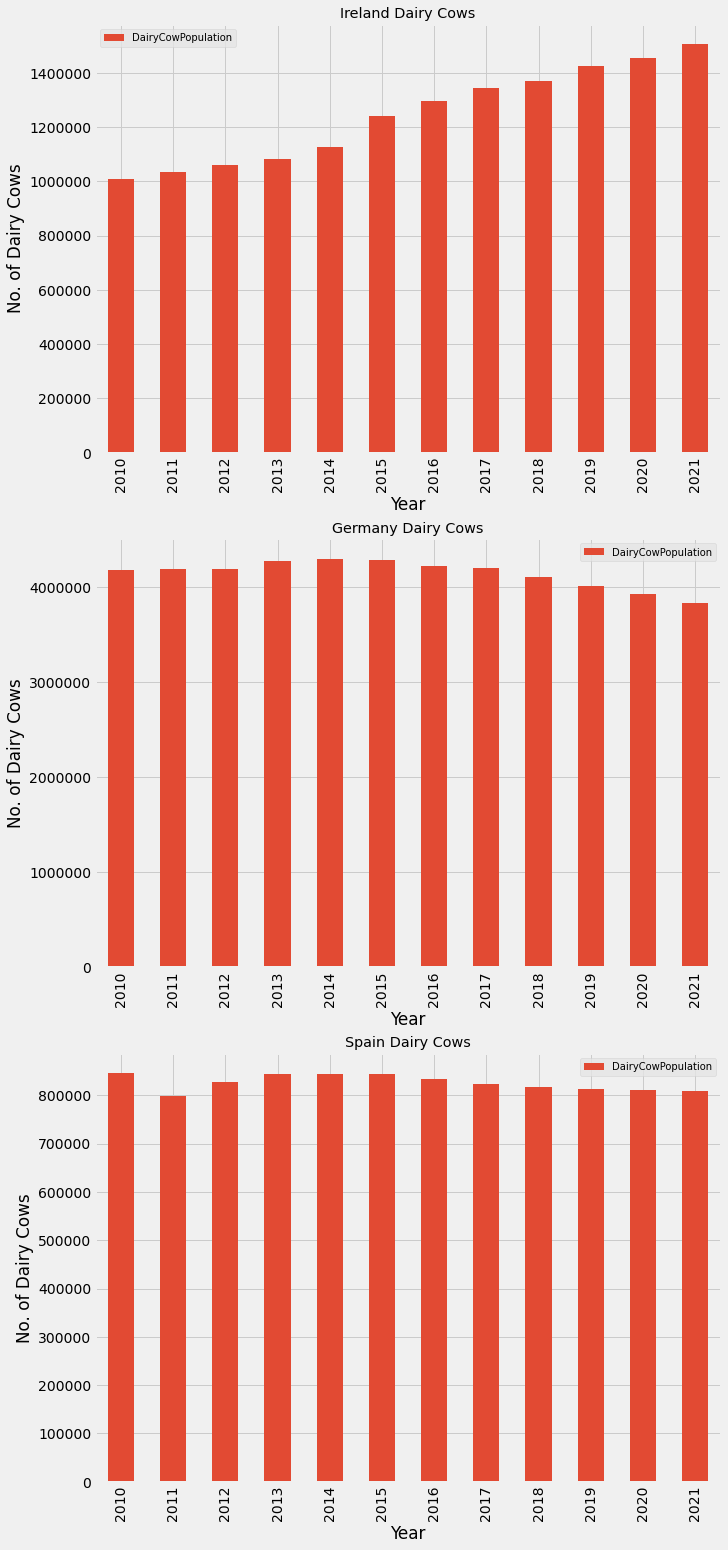

In [213]:
# Create a 2x1 grid of subplots, with the first subplot active
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10 ,25))
# Trying some different styles
#plt.style.use('seaborn-pastel')
plt.style.use('ggplot')


# Plotting Ireland's Data for Number of Cows.
df_ireland.plot(x='Year', y=['DairyCowPopulation'], kind ="bar", ax=axs[0])
#Adding my titles and lables
axs[0].set_title("Ireland Dairy Cows")
axs[0].set_xlabel("Year")
axs[0].set_ylabel("No. of Dairy Cows")
# Using this style plain on y axis to remove the scienctific number to show true population value
axs[0].ticklabel_format(axis='y', style='plain')

# Plot the data from df_germany in the second subplot
df_germany.plot(x='Year', y=['DairyCowPopulation'], kind ="bar", ax=axs[1])
#Adding my titles and lables
axs[1].set_title("Germany Dairy Cows")
axs[1].set_xlabel("Year")
axs[1].set_ylabel("No. of Dairy Cows")
# Using this style plain on y axis to remove the scienctific number to show true population value
axs[1].ticklabel_format(axis='y', style='plain')

# Plot the data from df_spain in the third subplot
df_spain.plot(x='Year', y=['DairyCowPopulation'], kind ="bar", ax=axs[2])
#Adding my titles and lables
axs[2].set_title("Spain Dairy Cows")
axs[2].set_xlabel("Year")
axs[2].set_ylabel("No. of Dairy Cows")
# Using this style plain on y axis to remove the scienctific number to show true population value
axs[2].ticklabel_format(axis='y', style='plain')
